In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import env
import wrangle
import explore
import evaluate

import warnings
warnings.filterwarnings("ignore")

from pydataset import data

from sklearn.linear_model import LinearRegression

#### Load the tips dataset

In [2]:
df = data('tips')
target = 'tip'
features = ['total_bill']

In [3]:
train, test, validate = wrangle.train_test_validate_split(df)

train	 n = 136
test	 n = 49
validate n = 59


In [4]:
x_train = train[features]
y_train = train[target]

x_validate = validate[features]
y_validate = validate[target]

x_test = test[features]
y_test = test[target]

#### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [5]:
# create  & fit the model
model = LinearRegression().fit(x_train, y_train)

# use the model to make predictions on the training set
train_predictions = model.predict(x_train)

# add predictions to a df

In [6]:
results = pd.DataFrame(columns=['x', 'y', 'baseline_predictions', 'train_predictions'])

In [7]:
results['x'] = x_train
results['y'] = y_train
results['baseline_predictions'] = y_train.mean()
results['train_predictions'] = train_predictions

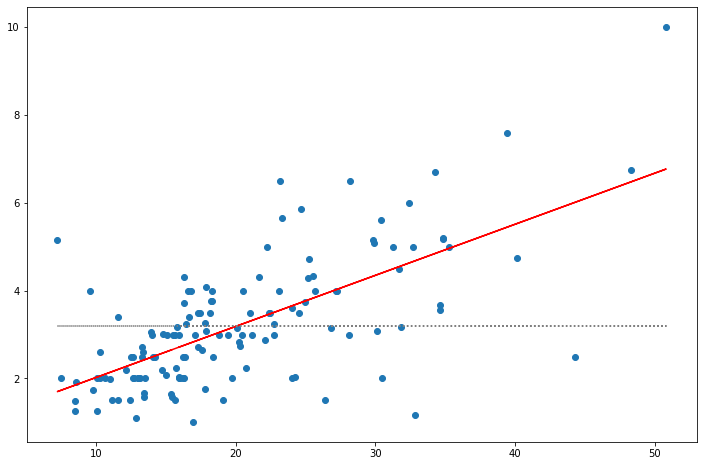

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(results.x, results.y)
plt.plot(results.x, results.train_predictions, c='red')
plt.plot(results.x, results.baseline_predictions, c='grey', ls=':')
plt.show()

#### Plot the residuals for the model that you made

In [9]:
results['baseline_residuals'] = results.y - results.baseline_predictions
results['train_residuals'] = results.y - train_predictions

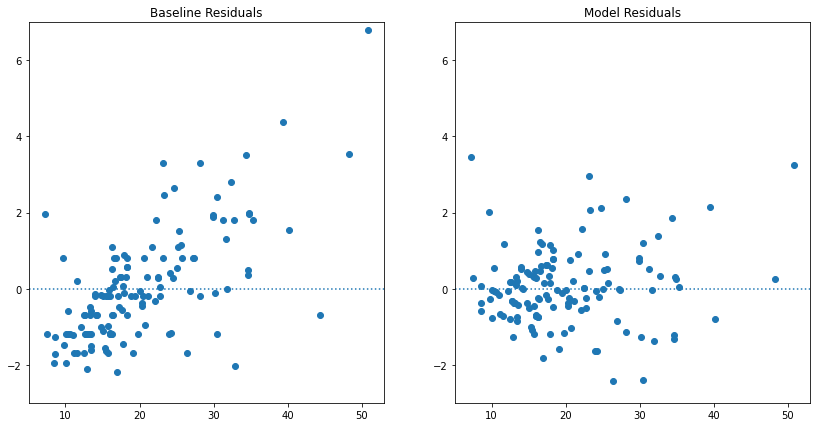

In [10]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.scatter(results.x, results.baseline_residuals)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals')
plt.ylim(-3, 7)

plt.subplot(122)
plt.scatter(results.x, results.train_residuals)
plt.axhline(y = 0, ls = ':')
plt.title('Model Residuals')
plt.ylim(-3, 7)

plt.show()

#### 5. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [11]:
results['baseline_residuals_sq'] = results.baseline_residuals ** 2
results['train_residuals_sq'] = results.train_residuals ** 2

In [12]:
sse = results.train_residuals_sq.sum()
sse_baseline = results.baseline_residuals_sq.sum()
sse, sse_baseline

(158.75918238873325, 288.43618823529414)

In [13]:
tss = sse_baseline
tss

288.43618823529414

In [14]:
ess = tss - sse
ess

129.6770058465609

In [15]:
mse = sse/len(results)
mse

1.167346929328921

In [16]:
rmse = math.sqrt(mse)
rmse

1.0804383042677268

#### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [17]:
sse = results.train_residuals_sq.sum()
sse_baseline = results.baseline_residuals_sq.sum()

if sse < sse_baseline:
    print('model performs better than baseline')
else: 
    print('model does not perform better than baseline')

model performs better than baseline


#### 7. What is the amount of variance explained in your model?


In [18]:
r2 = ess/tss
r2

0.44958646361245014

45% of variance is explained by the independent variable. 

#### 8. Is your model better than the baseline model

In [19]:
sse = results.train_residuals_sq.sum()
sse_baseline = results.baseline_residuals_sq.sum()

if sse < sse_baseline:
    print('model performs better than baseline')
else: 
    print('model does not perform better than baseline')

model performs better than baseline


#### 9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
        - SSE
        - ESS
        - TSS
        - MSE
        - RMSE
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your  model performs better than the baseline, otherwise false. 

In [20]:
def plot_residuals(x, y, y_hat):
    '''
    this function takes in a set of independent variable values, the corresponding set of 
    dependent variable values, and a set of predictions for the dependent variable. it then displays a plot
    of residuals for the given values. 
    '''
    plt.scatter(x, y - y_hat)
    plt.axhline(y = 0, ls = ':')
    plt.show()
    

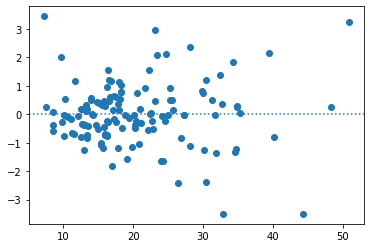

In [21]:
plot_residuals(results.x, results.y, results.train_predictions)

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def regression_errors(y, y_hat):
     
    SSE = ((y - y_hat) ** 2).sum()
    TSS = SSE_baseline = ((y.mean() - y_hat) ** 2).sum()
    ESS = TSS - SSE
    MSE = mean_squared_error(y, y_hat)
    RMSE = sqrt(MSE)
    
    print(f'SSE: {SSE}')
    print(f'ESS: {ESS}')
    print(f'TSS: {TSS}')
    print(f'MSE: {MSE}')
    print(f'RMSE: {RMSE}')
     
        
    return SSE, ESS, TSS, MSE, RMSE

In [23]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(results.y, results.train_predictions)

SSE: 158.75918238873325
ESS: -29.082176542172505
TSS: 129.67700584656075
MSE: 1.167346929328921
RMSE: 1.0804383042677268


In [24]:
SSE, ESS, TSS, MSE, RMSE

(158.75918238873325,
 -29.082176542172505,
 129.67700584656075,
 1.167346929328921,
 1.0804383042677268)

In [25]:
from math import sqrt

def baseline_mean_errors(y):
    
    SSE_baseline = ((y - y.mean()) ** 2).sum()
    MSE_baseline = SSE_baseline / len(y)
    RMSE_baseline = sqrt(MSE_baseline)
        
    print(f'Baseline SSE: {SSE_baseline}')
    print(f'Baseline MSE: {MSE_baseline}')
    print(f'Baseline RMSE: {RMSE_baseline}')

    return SSE_baseline, MSE_baseline, RMSE_baseline

In [26]:
SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(results.y)

Baseline SSE: 288.43618823529414
Baseline MSE: 2.120854325259516
Baseline RMSE: 1.456315324804184


In [27]:
SSE_baseline, MSE_baseline, RMSE_baseline

(288.43618823529414, 2.120854325259516, 1.456315324804184)

In [28]:
def better_than_baseline(y, y_hat):
    
    SSE = ((y - y_hat) ** 2).sum()
    SSE_baseline = ((y - y.mean()) ** 2).sum()

    if SSE < SSE_baseline:
        return True
    else:
        return False

In [29]:
better_than_baseline(results.y, results.train_predictions)

True

#### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [30]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [31]:
train, test, validate = wrangle.train_test_validate_split(df)

train	 n = 130
test	 n = 47
validate n = 57


In [32]:
target = 'hwy'
features = ['displ']

In [33]:
x_train = train[features]
y_train = train[target]

In [34]:
model = LinearRegression().fit(x_train, y_train)

In [35]:
train_predictions = model.predict(x_train)

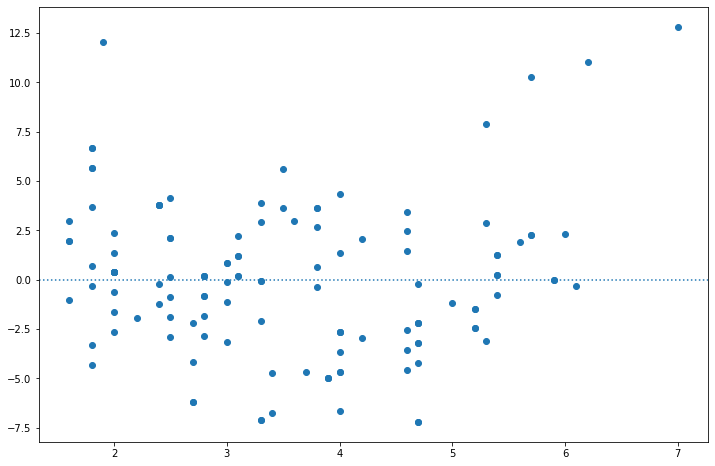

In [36]:
evaluate.plot_residuals(x_train, y_train, train_predictions)

In [37]:
evaluate.regression_errors(y_train, train_predictions)

SSE: 1877.0772189291424
ESS: 809.8763313724835
TSS: 2686.953550301626
MSE: 14.439055530224172
RMSE: 3.7998757256289544


(1877.0772189291424,
 809.8763313724835,
 2686.953550301626,
 14.439055530224172,
 3.7998757256289544)

In [38]:
evaluate.baseline_mean_errors(y_train)

Baseline SSE: 4564.030769230769
Baseline MSE: 35.10792899408284
Baseline RMSE: 5.925194426690388


(4564.030769230769, 35.10792899408284, 5.925194426690388)

In [39]:
evaluate.better_than_baseline(y_train, train_predictions)

True